# Second Practice ML
In this practice, we will learn how to use **Pandas** and **Scikit-learn**.  
We will also learn about **linear regression** with NE (**Normal Equation**) and SGD (Stochastic **Gradient Descent**).  

## Seaborn  
![92254613-279c8000-ee9f-11ea-9b73-5622a7d95f3f](https://user-images.githubusercontent.com/41818563/95926264-84575880-0dc4-11eb-970d-597c03e9055b.png)  
Link: https://seaborn.pydata.org/index.html  
Seaborn is a Python data visualization library based on matplotlib.  
It provides a high-level interface for drawing attractive and informative statistical graphics.

## Scikit-learn
![Webp net-resizeimage (2)](https://user-images.githubusercontent.com/41818563/95926460-09db0880-0dc5-11eb-9a54-f83901016949.png)  
Link: https://scikit-learn.org/stable/

Simple and efficient tools for predictive data analysis.  
Built on NumPy, SciPy, and Matplotlib.  
Open source, commercially usable - BSD license.  
With this package we can do machine learning tasks such as:  

### Preprocessing  
![image](https://user-images.githubusercontent.com/41818563/95853659-71aa3880-0d5e-11eb-8f94-85a026c4f639.png)  
Link: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing  

In the Preprocessing sub-package, there are methods to do tasks like feature extraction and normalization.  
One of the applications of this sub-package is transforming input data (such as text) for use with machine learning algorithms.  

### Dimensionality Reduction
![image](https://user-images.githubusercontent.com/41818563/95854295-6c99b900-0d5f-11eb-915b-838218f8c659.png)  
Link: https://scikit-learn.org/stable/modules/decomposition.html#decompositions  

In the Dimensionality Reduction sub-package, there are methods to do tasks like reducing the number of random variables to consider.  
Some of the applications of this sub-package are visualization and increasing efficiency.  

### Regression
![image](https://user-images.githubusercontent.com/41818563/95854782-16794580-0d60-11eb-89b2-15cf80fc3024.png)  
Link: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares  

In the Regression sub-package, there are methods to do tasks like predicting a continuous-valued attribute associated with an object.  
Some of the applications of this sub-package are predicting drug response and stock prices.  

### Classification
![image](https://user-images.githubusercontent.com/41818563/95857681-a4572f80-0d64-11eb-9d53-3caac9690845.png)  
Link: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression  

In the Classification sub-package, there are methods to do tasks like identifying which category an object belongs to.  
Some of the applications of this sub-package are spam detection and image recognition.  

### Clustering
![image](https://user-images.githubusercontent.com/41818563/95858501-df0d9780-0d65-11eb-9a9e-1328ad7b5b9f.png)  
Link: https://scikit-learn.org/stable/modules/clustering.html#clustering  

In the Clustering sub-package, there are methods to do tasks like an automatic grouping of similar objects into sets.  
Some of the applications of this sub-package are customer segmentation and grouping experiment outcomes.  

### Model Selection
![image](https://user-images.githubusercontent.com/41818563/95859142-d5386400-0d66-11eb-8373-e452631de884.png)  
Link: https://scikit-learn.org/stable/model_selection.html#model-selection  

In the Model Selection sub-package, there are methods to do tasks like comparing, validating, and choosing parameters and models.  
One of the applications of this sub-package is improving accuracy via parameter tuning.  





## Imports and Definitions


In [ ]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import matplotlib.pyplot as plt

# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

## Data Investigation and Preprocessing

We use the [Boston House Prices Dataset](https://scikit-learn.org/stable/datasets/index.html?highlight=boston%20housing%20price#boston-house-prices-dataset) in this practice for the regression task.  

In [ ]:
# import sklearn and load boston dataset
import sklearn
from sklearn import datasets

boston_data = datasets.load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


We got a result of dictionary with five keys:  
`['data', 'target', 'feature_names', 'DESCR', 'filename']`  
1. `DESCR` - the description of the dataset.  
2. `filename` - the location of the CSV file that contains the dataset.  
3. `data` - the NumPy array with the data (the samples we want to learn from).  
4. `target` - the list with the labels (the values we want to predict).
5. `feature_names` - the names of the features (the values of each sample).

Let's check each key:

In [ ]:
# print DESCR
print('DESCR', f'len: {len(boston_data["DESCR"])}', f'type: {type(boston_data["DESCR"])}', boston_data["DESCR"], sep='\n')

DESCR
len: 2341
type: <class 'str'>
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax ra

In [ ]:
# print filename
print('filename', f'len: {len(boston_data["filename"])}', f'type: {type(boston_data["filename"])}', boston_data["filename"], sep='\n')

filename
len: 84
type: <class 'str'>
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv


In [ ]:
# print data
print('data', f'shape: {boston_data["data"].shape}', f'type: {type(boston_data["data"])}', boston_data["data"], sep='\n')

data
shape: (506, 13)
type: <class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
# print target
print('target', f'shape: {boston_data["target"].shape}', f'type: {type(boston_data["target"])}', boston_data["target"], sep='\n')

target
shape: (506,)
type: <class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  

In [ ]:
# print feature_names
print('feature_names', f'len: {len(boston_data["feature_names"])}', f'type: {type(boston_data["feature_names"])}', boston_data["feature_names"], sep='\n')

feature_names
len: 13
type: <class 'numpy.ndarray'>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The data is a matrix of shape (506, 13), with 506 samples ([suburbs](https://en.wikipedia.org/wiki/Greater_Boston#Largest_cities_and_towns) of [Boston](https://en.wikipedia.org/wiki/Neighborhoods_in_Boston#List_of_places_and_squares_within_neighborhood_areas)) and 13 features for each suburb.  
The labels are a list of 506 numeric values that represent the median value of homes in each [suburb](https://en.wikipedia.org/wiki/Suburb).   
To display the data in a better way, we can use Pandas DataFrame (table).  
We can read the data directly from the CSV file or the loaded `data` and `target`. 

In [ ]:
# import pandas, read and display boston data csv
import pandas as pd

boston_df = pd.read_csv(boston_data['filename'])
boston_df.columns = boston_df.iloc[0]
boston_df.drop(0, inplace=True)
boston_df.reset_index(drop=True, inplace=True)
boston_df = boston_df.astype(np.float64)
display(boston_df)
print(f'the type of (0, 0): {type(boston_df.iloc[0, 0])}')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


the type of (0, 0): <class 'numpy.float64'>


In [ ]:
# display boston data from dictionary
boston_df = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
boston_df['MEDV'] = boston_data['target']
display(boston_df)
print(f'the type of (0, 0): {type(boston_df.iloc[0, 0])}')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


the type of (0, 0): <class 'numpy.float64'>


When we read from CSV
We need to check if their missing values in the data.  
If so, we will need to decide what to do with them.  
We can insert some constant value in place of the missing values.  
We can also put there a median or a mean of the feature.  
We can also delete every row with a missing value (not recommended. on small datasets, every sample counts).  
You can read about these ways and a few more in [7 Ways to Handle Missing Values in Machine Learning](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e).

In [ ]:
boston_df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In this dataset, there are no missing values.

We want to see how the target depends on each feature.  
We want to detect the most meaningful features in this dataset.  
We can plot the connection between each feature to the target values (`MEDV`).  

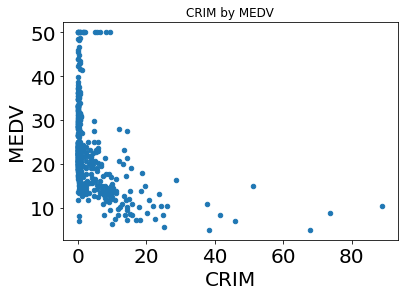

In [ ]:
# plot the connection between 2 features
def plot_connection_between_2_features(df, feature_1_name, feature_2_name):
    df.plot.scatter(x=feature_1_name, y=feature_2_name, title=f'{feature_1_name} by {feature_2_name}')

plot_connection_between_2_features(boston_df, 'CRIM', 'MEDV')

We can plot all the connections between a feature and the target values, on one graph or in a few sub-plots. 

## This is what axis and figure mean when we use matplotlib's subplots:
![Meaning of subplots](https://i.imgur.com/o5Fgoxt.png)

Figure is the entire picture while each axis object is a subplot inside the figure. For every subplot there will always be one figure and an array of axis objects (In this case we have four axis objects in our array). 

![Corr Example](https://www.datadeck.com/en/blog/wp-content/uploads/2018/11/cor-examples.png)  
In the plots above we can see examples of different correlations according to pearson coefficient.

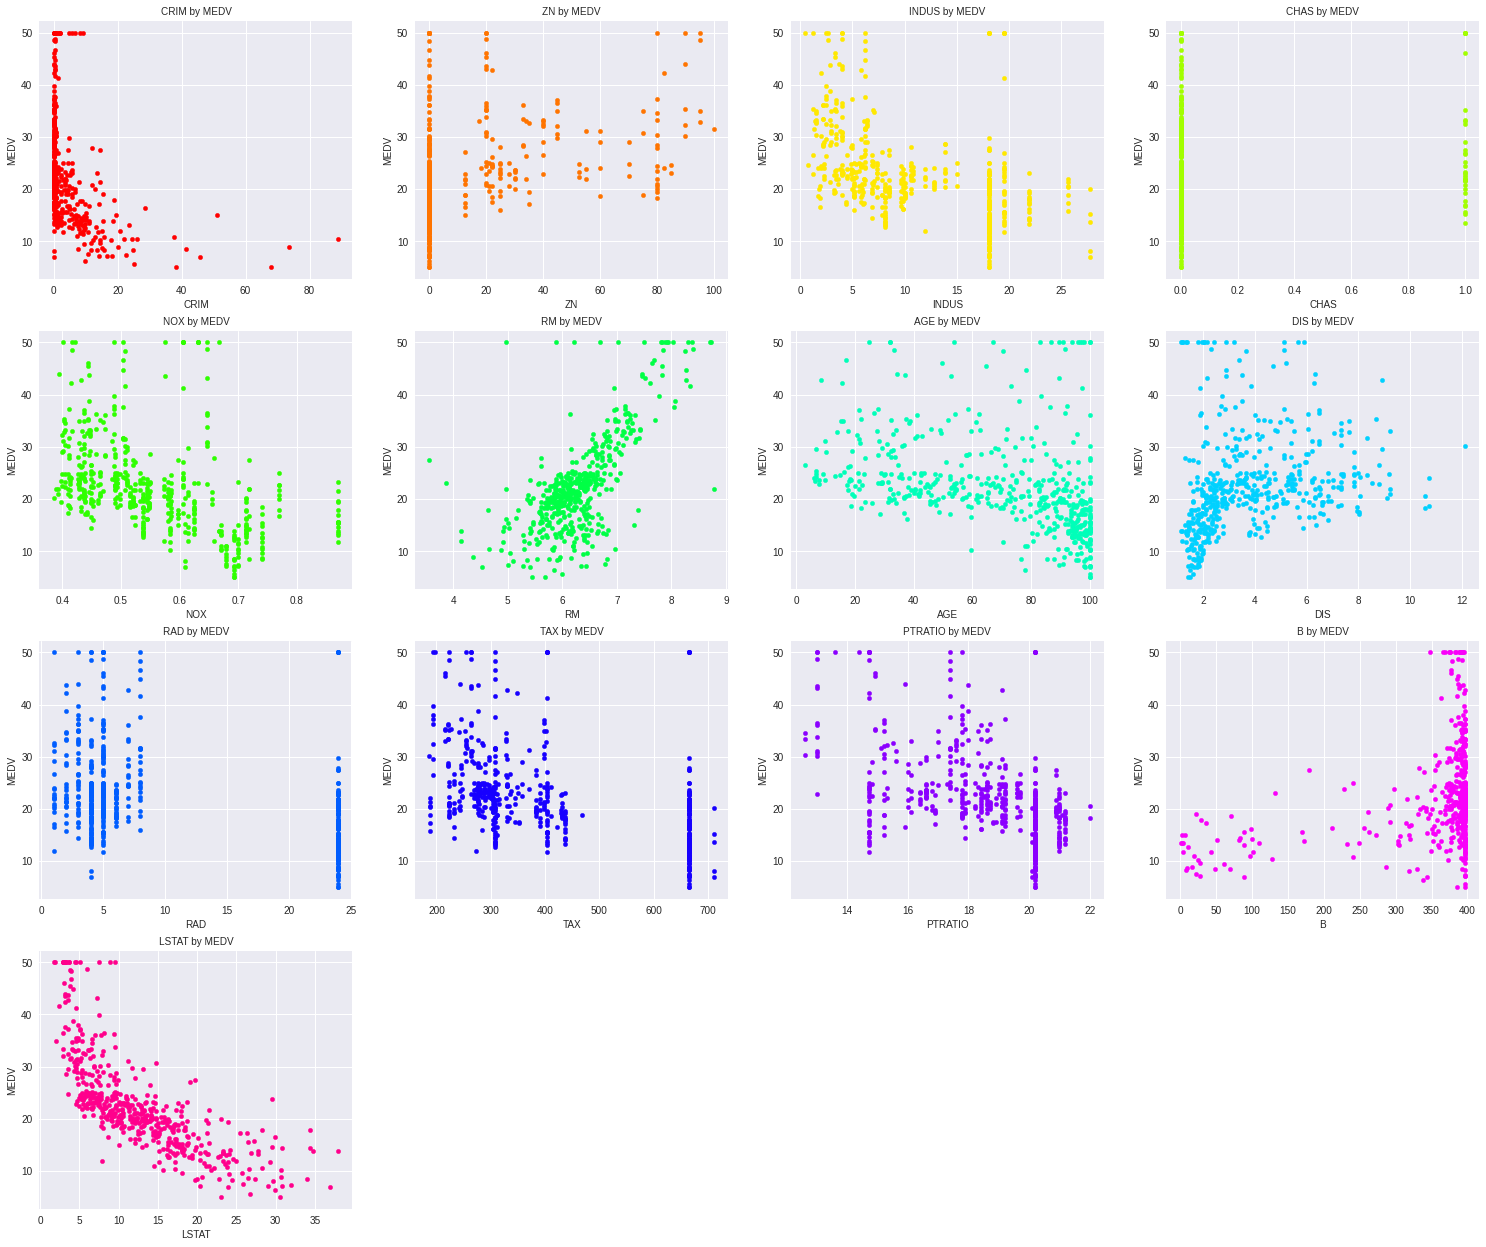

In [ ]:
# get color map
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

# plot target values by each feature
def plot_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3, bottom=0, left=0, right=2.5)
    colors = get_cmap(len(df.columns))

    for i in range(len(df.columns)-1):
        df.plot(kind='scatter', x=df.columns[i], y=target_column_name, title=f'{df.columns[i]} by {target_column_name}', ax=axes[i//nrows, i%nrows], color=colors(i))
        axes[i//nrows, i%nrows].tick_params(axis='both', labelsize=10)
        axes[i//nrows, i%nrows].xaxis.label.set_size(10)
        axes[i//nrows, i%nrows].yaxis.label.set_size(10)
        axes[i//nrows, i%nrows].title.set_fontsize(10)

    for i in range(len(df.columns)-1, nrows*ncols): 
        fig.delaxes(axes.flatten()[i]) # Flattening so we can access axes array as a 1-d array to delete unused axes objects

plot_target_values_by_each_feature(boston_df, 'MEDV')

If we use Seaborn, we can plot the regression line and histograms (it is called [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn-jointplot)).

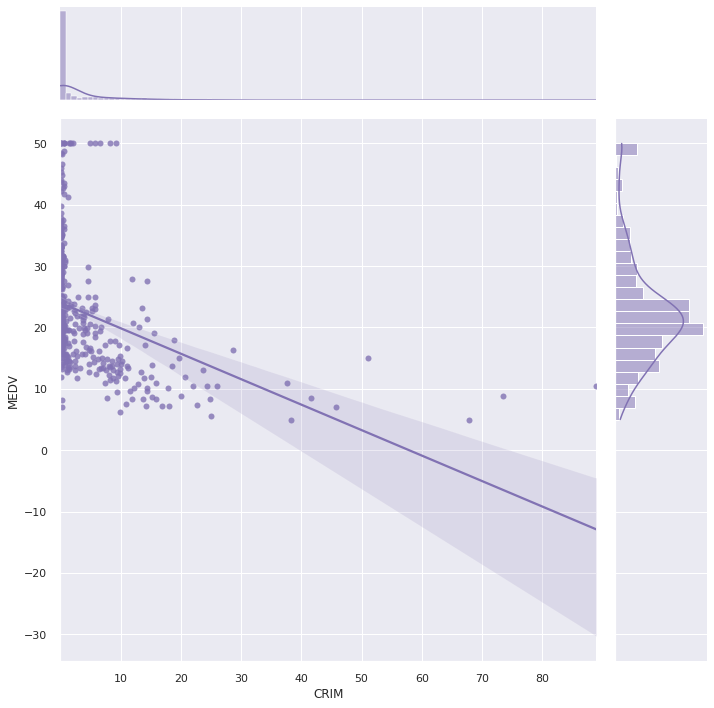

In [ ]:
# imort seaborn and draw regression joint plot
import seaborn as sns

sns.set_theme(style="darkgrid")
g = sns.jointplot(x="CRIM", y="MEDV", data=boston_df, kind="reg", color="m", height=10)

In a subplot, the joint plot is not so easy to implement, so we will plot only the scatter plot with the regression line (it is called [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn-regplot)).  
We will use a different [color pallet](https://seaborn.pydata.org/generated/seaborn.color_palette.html), for better visualization of the regression line and its fan.

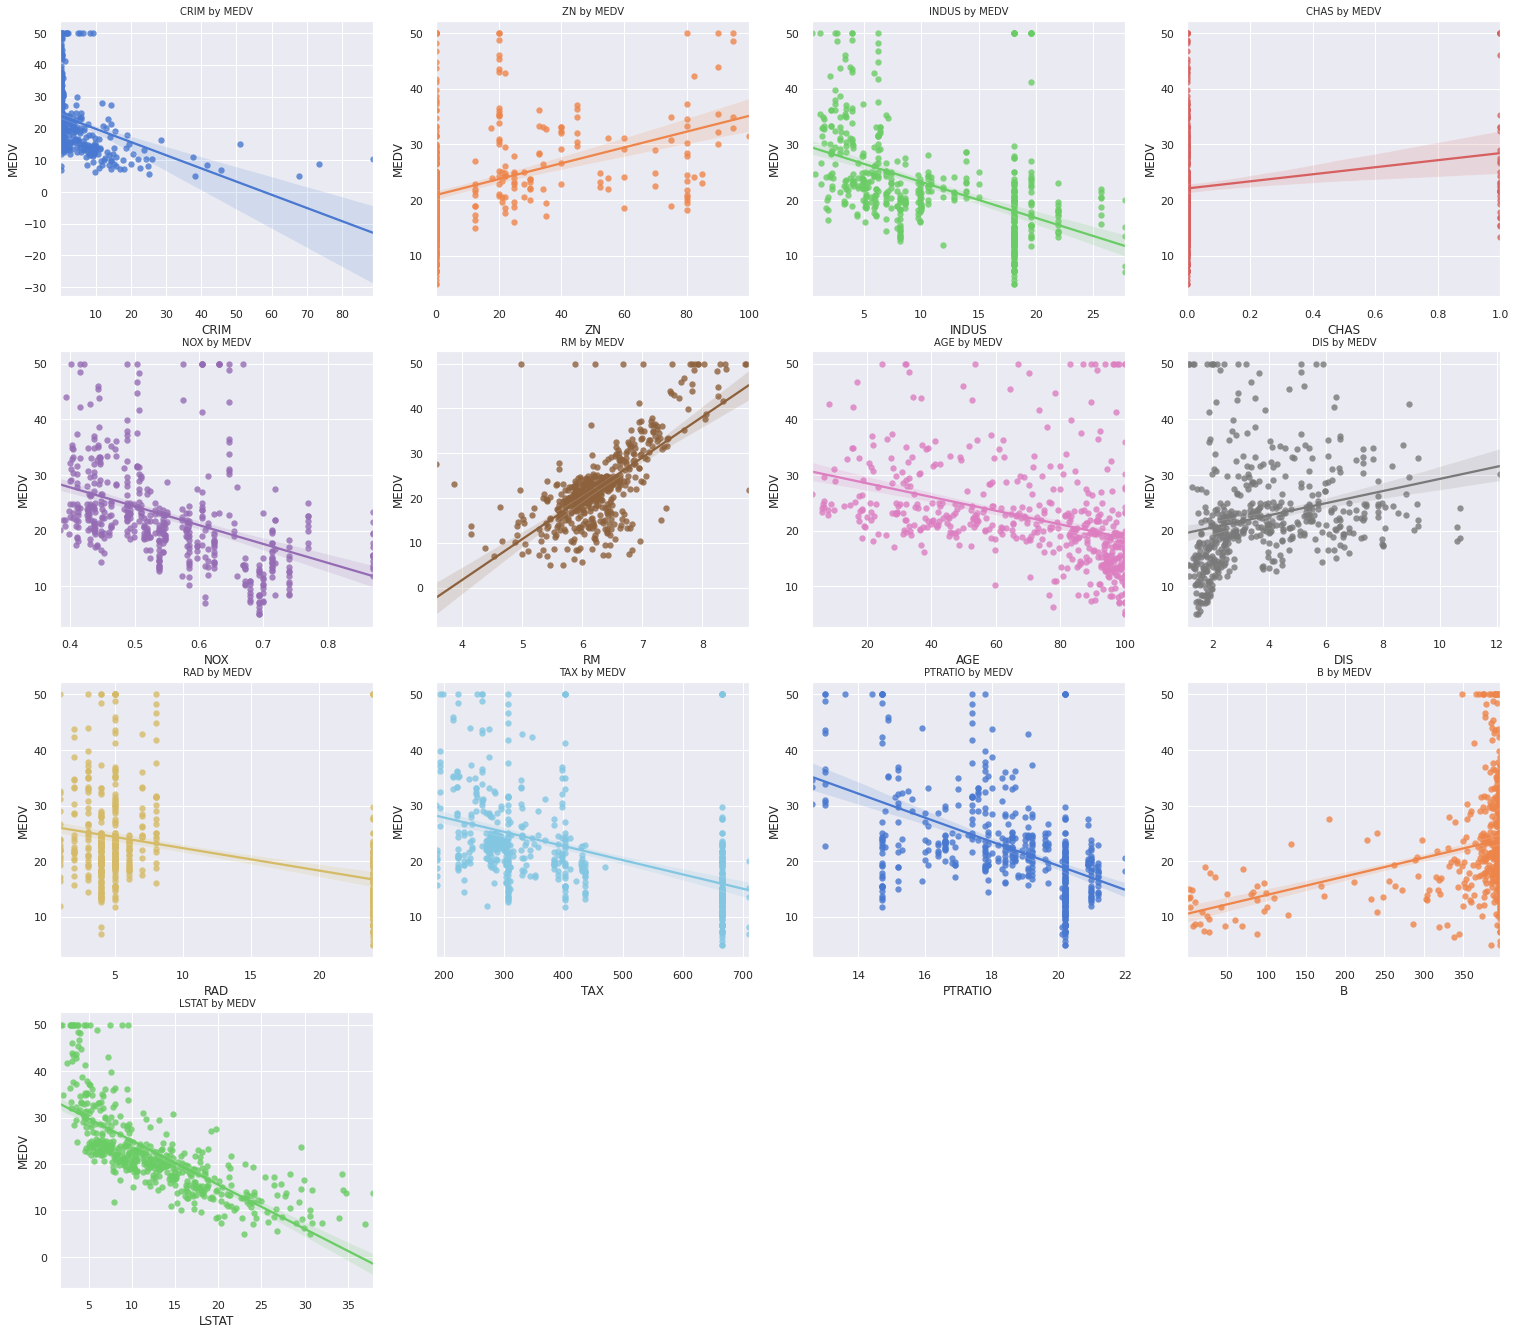

In [ ]:
# get color map
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

# plot with regression line target values by each feature
def plot_reg_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3.2, bottom=0, left=0, right=2.5)
    colors = get_sns_cmap(len(df.columns))

    for i in range(len(df.columns)-1):
        ax = sns.regplot(x=df.columns[i], y=target_column_name, data=df, color=colors[i], ax=axes[i//nrows, i%nrows], scatter_kws={"s": 40})
        ax.set_title(label=f'{df.columns[i]} by {target_column_name}', fontsize=10)
   
    for i in range(len(df.columns)-1, nrows*ncols):
        fig.delaxes(axes.flatten()[i])

plot_reg_target_values_by_each_feature(boston_df, 'MEDV')

It looks like the features that have the best correlation with the target values are LSTAT and RM.  
Let's plot a heatmap of the correlation table between the features.

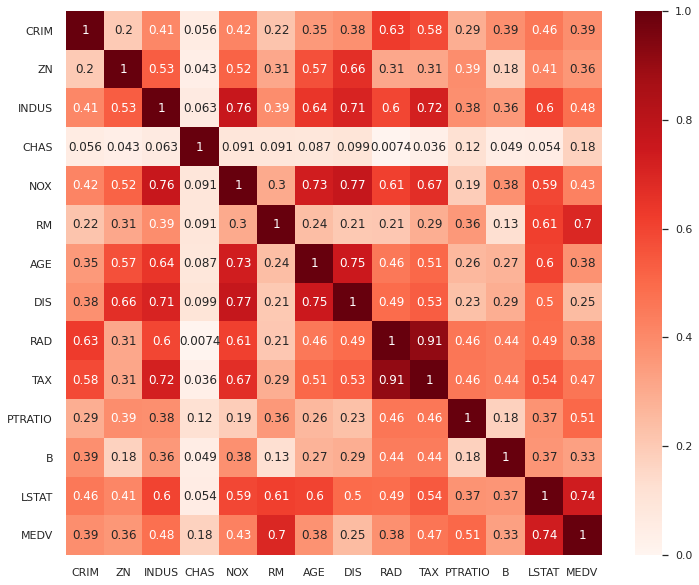

In [ ]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = np.abs(boston_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

Let's split the data to train and test with Scikit-learn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  


In [ ]:
# detach the target values from the input data
t = boston_df['MEDV']
X = boston_df.drop('MEDV', axis=1)
print('X')
display(X)
print()
print('t')
display(t) 

X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48



t


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
#import model_selection and split to train and test
from sklearn import model_selection

X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_test')
display(X_test)
print()
print('t_test')
display(t_test)

X_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
286,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47



t_train


321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: MEDV, Length: 404, dtype: float64


X_test


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
183,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38



t_test


463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: MEDV, Length: 102, dtype: float64

## Regression

We have two options for solving the regression problem (Learning the target values from the data features).  
1. By using the Normal Equation (NE)  
2. By using Gradient Descent (GD)  

When we use Scikit-learn, the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model is using NE.  
There is no implementation for regular GD regressor, only [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).  
See [GD vs. SGD](https://datascience.stackexchange.com/a/36451) for more details.    
Let's try linear regression with NE.

The Normal Equation for Linear Regression Model:  
![NE Linear Regression](https://i.imgur.com/dutDkUY.png)

In [ ]:
# import linear_model and train with NE
from sklearn import linear_model

NE_reg = linear_model.LinearRegression().fit(X_train, t_train)

We can calculate the [R2 score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) of each group, to see how good our model performed on the train and test sets (This score is neither MSE nor RMSE).  
This is the differences between all the scores and losses we talked about so far:  
![formula-MAE-MSE-RMSE-RSquared](https://user-images.githubusercontent.com/41818563/96027581-bcac7480-0e60-11eb-84f6-8aff9f4e40ed.JPG)  

The R2 is a score that is based on the MSE loss function.  
The R2 values are in range `(-infinity, 1]`.  
The highest the score, the better the model.  
It determines how well the regression predictions approximate the real data points (See more in [Importance of Model Evaluation](https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/)).  




In [ ]:
# calculate score for each group
print('R2 score on train', NE_reg.score(X_train, t_train))
print('R2 score on test', NE_reg.score(X_test, t_test))

R2 score on train 0.7285831776605591
R2 score on test 0.7789207451814417


To calculate the MSE or RMSE, we can use Scikit-learn [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).  

In [ ]:
# import metrics and calculate MSE and RMSE
from sklearn import metrics

y_train = NE_reg.predict(X_train)
y_test = NE_reg.predict(X_test)
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('RMSE on train', metrics.mean_squared_error(t_train, y_train, squared=False))
print('RMSE on test', metrics.mean_squared_error(t_test, y_test, squared=False))

MSE on train 22.953693576112883
MSE on test 18.495420122448397

RMSE on train 4.791001312472465
RMSE on test 4.300630200615765


Let's try with SGD.

In [ ]:
# run SGD on the data
SGD_reg = linear_model.SGDRegressor(alpha=0, learning_rate='constant').fit(X_train, t_train)
y_train = SGD_reg.predict(X_train)
y_test = SGD_reg.predict(X_test)
print('R2 score on train', SGD_reg.score(X_train, t_train))
print('R2 score on test', SGD_reg.score(X_test, t_test))
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('RMSE on train', metrics.mean_squared_error(t_train, y_train, squared=False))
print('RMSE on test', metrics.mean_squared_error(t_test, y_test, squared=False))

R2 score on train -5.557198134201419e+28
R2 score on test -5.774822736894318e+28

MSE on train 4.6997169156552126e+30
MSE on test 4.8311983292681987e+30

RMSE on train 2167883049349114.0
RMSE on test 2197998710024234.5


We can see that the model performance is bad.  
The reason is that the features are not standardized.  
We can see that in the picture below:  
![1_ImvekfhM6sXo2IyAdslKLg](https://user-images.githubusercontent.com/41818563/95975483-e8a70600-0e1e-11eb-97f5-33bc8aecbbe9.png)  
Our case is case `a`. The model is having a hard time finding the minimum.  
We need to standardize the features to have case `b`, so it will be easier for the model to find the minimum.  
We can do it with Scikit-learn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).  


In [ ]:
# import pipeline and preprocessing from sklearn, standardize the features
# and run SGD on the data
from sklearn import pipeline, preprocessing

SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor(alpha=0, learning_rate='constant')).fit(X_train, t_train)
y_train = SGD_reg.predict(X_train)
y_test = SGD_reg.predict(X_test)
print('R2 score on train', SGD_reg.score(X_train, t_train))
print('R2 score on test', SGD_reg.score(X_test, t_test))
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('RMSE on train', metrics.mean_squared_error(t_train, y_train, squared=False))
print('RMSE on test', metrics.mean_squared_error(t_test, y_test, squared=False))

R2 score on train 0.7222344108426189
R2 score on test 0.7718742387833908

MSE on train 23.490608152258584
MSE on test 19.08492860588541

RMSE on train 4.846711065481269
RMSE on test 4.368630060543627


Now it performs better, close to the performance of NE.  
Let's try to predict only from our best two features (LSTAT and RM).

In [ ]:
# run SGD on LSTAT and RM
SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor(alpha=0, learning_rate='constant')).fit(X_train[['LSTAT', 'RM']], t_train)
y_train = SGD_reg.predict(X_train[['LSTAT', 'RM']])
y_test = SGD_reg.predict(X_test[['LSTAT', 'RM']])
print('R2 score on train', SGD_reg.score(X_train[['LSTAT', 'RM']], t_train))
print('R2 score on test', SGD_reg.score(X_test[['LSTAT', 'RM']], t_test))
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('RMSE on train', metrics.mean_squared_error(t_train, y_train, squared=False))
print('RMSE on test', metrics.mean_squared_error(t_test, y_test, squared=False))

R2 score on train 0.6156607113353767
R2 score on test 0.7176418714809754

MSE on train 32.50353528284966
MSE on test 23.621991200547757

RMSE on train 5.701187181881477
RMSE on test 4.8602460020607765


We can see that it is not better than using all the features.  
It means that some other features are helping the prediction.  
We will learn more about feature selection in future practices.  

## More Information 
Scikit-learn toy datasets.  
[Toy Datasets](https://scikit-learn.org/stable/datasets/index.html?highlight=boston%20housing%20price#toy-datasets)  

The difference between `isna` and `isnull` pandas.DataFrame methods  
[Difference between isna() and isnull() in pandas](https://datascience.stackexchange.com/a/37879)  

Documentation of plt.rcParams:  
[A sample matplotlibrc file](https://matplotlib.org/3.3.2/tutorials/introductory/customizing.html#a-sample-matplotlibrc-file)  

Documentation of matplotlib.pyplot.axes:  
[matplotlib.pyplot.axes](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axes.html#matplotlib-pyplot-axes)   

Guide for multi-output regression models:  
[How to Develop Multi-Output Regression Models with Python
](https://machinelearningmastery.com/multi-output-regression-models-with-python/)  

How Scikit-learn implements GD and NE:  
[Linear Regression and Gradient Descent in Scikit learn/Pandas?](https://stackoverflow.com/a/34470001)  

The differences between normalization and standardization:  
[Normalization vs Standardization](https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb)  

Explanation on Seaborn color palettes:  
[Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

How to create a custom score in Scikit-learn:  
[Custom Loss vs Custom Scoring](https://kiwidamien.github.io/custom-loss-vs-custom-scoring.html)

How to create a custom loss in Scikit-learn:  
[Fitting Linear Models with Custom Loss Functions and Regularization in Python](https://alex.miller.im/posts/linear-model-custom-loss-function-regularization-python/)  

How to use MAE as a loss function in Scikit-learn SGDRegressor:  
[Training Linear Models with MAE using sklearn in Python](https://stackoverflow.com/a/50394085)  

Guide for using Seaborn:  
[An introduction to seaborn](https://seaborn.pydata.org/introduction.html)  


